<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

# Funciones avanzadas en pandas (pero muy útiles)

En esta notebook vamos a ver ejemplos de datos en formato long y en formato wide, y cómo transformarlos de uno al otro. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [8]:
# Con esto hacemos los gráficos más grandes, adecuados para las presentaciones.
seaborn.set_context(context='talk', font_scale=1.0)

In [10]:
dataset = pandas.read_csv('../data/dataset-ayvd2020.csv')

In [11]:
dataset.columns = [
    'timestamp', 
    'gender', 
    'age', 
    'zodiac_sign', 
    'profession', 
    'junior_programmer_salary', 
    'senior_programmer_salary'
]

In [12]:
dataset

,timestamp,gender,age,zodiac_sign,profession,junior_programmer_salary,senior_programmer_salary
0,31/03/2020 17:10:01,Mujer,27,Tauro,Programadora,40000.0,80000.0
1,12/05/2020 15:19:14,Mujer,40,Acuario,Docente investigadora,50000.0,90000.0
2,13/05/2020 13:43:48,Hombre,22,Géminis,Estudiante de Astronomía,25000.0,60000.0
3,13/05/2020 18:12:04,Mujer,23,Cáncer,profesora,32000.0,50000.0
4,14/05/2020 16:30:09,Hombre,33,Capricornio,Docente investigador,60000.0,80000.0
...,...,...,...,...,...,...,...
156,27/05/2020 21:26:48,Hombre,21,Escorpio,sommelier,65000.0,75000.0
157,27/05/2020 21:27:26,Mujer,25,Libra,boxeadora profesional,45000.0,50000.0
158,27/05/2020 21:28:19,Mujer,29,Sagitario,paseadora de patos,125000.0,140000.0
159,27/05/2020 21:28:52,Mujer,26,Cáncer,Testeadora de toboganes,60000.0,80000.0


## Group by

Los tipos de gráficos que hemos visto calculan estimadores para grupos de valores automáticamente. Por ejemplo, si realizamon un gráfico de barra con el parámetro `hue='gender'`, se calcula la media por cada uno de los valores de `gender`, y luego se dibuja cada barra utilizando ese valor.

En pandas se puede realizar la misma operación explícitamente a través de un *agrupado* de datos, usando la función `groupby`, y subsecuentemente un *agregado* de los datos en cada uno de los grupos. Las funciones de agregado son muy variadas: `sum`, `count`, `mean` e incluso nuevas funciones definidas por el usuario. Veamos un ejemplo.

In [13]:
dataset.groupby(
    ["gender", "zodiac_sign", "profession"]
).mean()

age  \
gender              zodiac_sign profession                                
Hombre              Acuario     Desarrollador                      26.0   
                                Funcionario público y emprendedor  28.0   
                                estudiante de economía             25.0   
                                investigador-docente               33.0   
                    Aries       Director                           41.0   
...                                                                 ...   
Prefiero no decirlo Libra       Lic. en Química                    45.0   
                                lksadaokpoqwe                       9.0   
                                psicologo                          33.0   
                    Picis       Ingenieria                         25.0   
                    Virgo       estudiante                         22.0   

                                                                   junior_programmer_salary  \
gender              zodiac_sign profession                                                    
Hombre              Acuario     Desarrollador                                       50000.0   
                                Funcionario público y emprendedor                   55000.0   
                                estudiante de economía                              70000.0   
                                investigador-docente                                60000.0   
                    Aries       Director                                            60000.0   
...                                                                                     ...   
Prefiero no decirlo Libra       Lic. en Química                                     45000.0   
                                lksadaokpoqwe                                           3.0   
                                psicologo                                           60000.0   
                    Picis       Ingenieria                                          70000.0   
                    Virgo       estudiante                                          30000.0   

                                                                   senior_programmer_salary  
gender              zodiac_sign profession                                                   
Hombre              Acuario     Desarrollador                                       70000.0  
                                Funcionario público y emprendedor                   75000.0  
                                estudiante de economía                             100000.0  
                                investigador-docente                                80000.0  
                    Aries       Director                                           120000.0  
...                                                                                     ...  
Prefiero no decirlo Libra       Lic. en Química                                     80000.0  
                                lksadaokpoqwe                                           4.0  
                                psicologo                                          100000.0  
                    Picis       Ingenieria                                         100000.0  
                    Virgo       estudiante                                          40000.0  

[148 rows x 3 columns]

Vemos que las columnas que utilizamos para agrupar ahora son parte del índice, y que todas las columnas restantes fueron agregadas.

## Ejercicio 1

Agrupen los valores por género y agréngenlos usando la función `median`. Luego, utilicen esos datos para hacer un gráfico de barras que compare las medias de distintos grupos. Pista: usen la función `reset_index` para trabajar más cómodamente con los datos.

## Formatos long y wide

El tipo de formato de un dataset puede ser `long` o `wide`. Esto hace referencia a la forma que toma para representar la misma información: en el caso de `wide`, el dataset tiene muchas columnas, y en el caso de `long` tiene muchas filas.

En nuestro dataset, luego de agrupar los datos nos queda un formato long. Tomemos un ejemplo:

In [14]:
long_dataset = dataset.groupby(["gender", "zodiac_sign"]).mean()[
    ['junior_programmer_salary', 'senior_programmer_salary']
]
long_dataset

junior_programmer_salary  \
gender              zodiac_sign                             
Hombre              Acuario                  58750.000000   
                    Aries                    46250.000000   
                    Capricornio              50000.000000   
                    Cáncer                   54400.000000   
                    Escorpio                 53006.500000   
                    Géminis                  46538.461538   
                    Leo                      54285.714286   
                    Libra                    57272.727273   
                    Picis                    52307.692308   
                    Sagitario                47000.000000   
                    Tauro                    50000.000000   
                    Virgo                    49285.714286   
Mujer               Acuario                  42500.000000   
                    Aries                    52508.750000   
                    Capricornio              40000.000000   
                    Cáncer                   45666.666667   
                    Escorpio                 45000.000000   
                    Géminis                  63333.333333   
                    Leo                      48000.000000   
                    Libra                    50000.000000   
                    Picis                    51666.666667   
                    Sagitario                65750.000000   
                    Tauro                    40000.000000   
                    Virgo                    50000.000000   
Otro                Acuario                  50000.000000   
                    Géminis                  68000.000000   
                    Picis                    35000.000000   
                    Virgo                    50000.000000   
Prefiero no decirlo Cáncer                   25000.000000   
                    Leo                      40000.000000   
                    Libra                    35001.000000   
                    Picis                    70000.000000   
                    Virgo                    30000.000000   

                                 senior_programmer_salary  
gender              zodiac_sign                            
Hombre              Acuario                  81250.000000  
                    Aries                    73125.000000  
                    Capricornio              80909.090909  
                    Cáncer                   87200.000000  
                    Escorpio                 82513.000000  
                    Géminis                  80153.846154  
                    Leo                     200714.285714  
                    Libra                    78636.363636  
                    Picis                   153076.923077  
                    Sagitario                68000.000000  
                    Tauro                    82000.000000  
                    Virgo                    82142.857143  
Mujer               Acuario                  70000.000000  
                    Aries                    70011.250000  
                    Capricornio              55000.000000  
                    Cáncer                   60000.000000  
                    Escorpio                 66250.000000  
                    Géminis                 155000.000000  
                    Leo                      77000.000000  
                    Libra                    75000.000000  
                    Picis                    78333.333333  
                    Sagitario                86250.000000  
                    Tauro                    66666.666667  
                    Virgo                    80000.000000  
Otro                Acuario                  80000.000000  
                    Géminis                  80000.000000  
                    Picis                   150000.000000  
                    Virgo                    85000.000000  
Prefiero no decirlo Cáncer                   50000.000000  
                    Leo              

En este caso, tenemos una fila por cada valor de `zodiac_sign`, pero podríamos crear una columna distinta para cada signo, y utilizar el valor de la estimación de salario para rellenar la celda correspondiente. En pandas, esta operación se realiza con la función `pivot`. Notar que debemos elegir aquí si quedarnos con la columna de las estimaciones para junior o para senior, no podemos elegir ambas.

In [15]:
wide_dataset = long_dataset.reset_index().pivot(
    index='gender', columns='zodiac_sign',
    values='junior_programmer_salary'
)
wide_dataset

zodiac_sign,Acuario,Aries,Capricornio,Cáncer,Escorpio,Géminis,Leo,Libra,Picis,Sagitario,Tauro,Virgo
gender,,,,,,,,,,,,
Hombre,58750.0,46250.00,50000.0,54400.000000,53006.5,46538.461538,54285.714286,57272.727273,52307.692308,47000.0,50000.0,49285.714286
Mujer,42500.0,52508.75,40000.0,45666.666667,45000.0,63333.333333,48000.000000,50000.000000,51666.666667,65750.0,40000.0,50000.000000
Otro,50000.0,NaN,NaN,NaN,NaN,68000.000000,NaN,NaN,35000.000000,NaN,NaN,50000.000000
Prefiero no decirlo,NaN,NaN,NaN,25000.000000,NaN,NaN,40000.000000,35001.000000,70000.000000,NaN,NaN,30000.000000


Por otra parte, las estimaciones de salario se podrían considerar en formato `wide`. Para usar el formato long, tendríamos que tener una única columna `estimation`, y otra que nos describa el tipo de la estimación (junior o senior). Esto se logra en pandas con la función `melt`.

In [31]:
data_melt = pandas.melt(long_dataset.reset_index(), id_vars=['gender', 'zodiac_sign'],
            value_vars=['junior_programmer_salary', 'senior_programmer_salary'],
            var_name='estimation_type', value_name='estimation')
data_melt

,gender,zodiac_sign,estimation_type,estimation
0,Hombre,Acuario,junior_programmer_salary,58750.000000
1,Hombre,Aries,junior_programmer_salary,46250.000000
2,Hombre,Capricornio,junior_programmer_salary,50000.000000
3,Hombre,Cáncer,junior_programmer_salary,54400.000000
4,Hombre,Escorpio,junior_programmer_salary,53006.500000
...,...,...,...,...
61,Prefiero no decirlo,Cáncer,senior_programmer_salary,50000.000000
62,Prefiero no decirlo,Leo,senior_programmer_salary,80000.000000
63,Prefiero no decirlo,Libra,senior_programmer_salary,60001.333333
64,Prefiero no decirlo,Picis,senior_programmer_salary,100000.000000


Esto es importante porque las herramientas de visualización como seaborn utilizan el formato `long`. Ahora podemos realizar con un solo comando un gráfico de barras que compare las estimaciones para junior y senior utilizando el parámetro `hue='estimation_type'`.

## Ejercicio 2

Realizar dicho gráfico de barras.

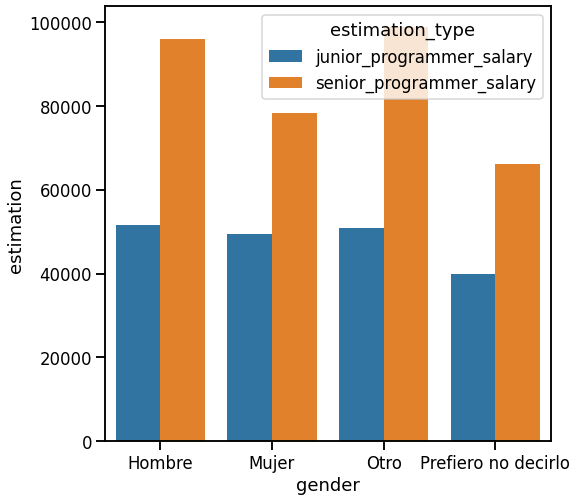

In [32]:
plt.figure(figsize=(8, 8))
seaborn.barplot(data=data_melt, x='gender', y='estimation', hue='estimation_type',
               ci=None)
plt.show()

## Ejercicio 3

Utilizar la función `melt` junto con la función `cut` para comparar en un gráfico de línea las estimaciones de distintos grupos etáreos para seniors y juniors.

In [39]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    
    min_cut = int(round(column.min())) - 1 if min_cut is None else min_cut
        
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    # print(intervals)
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))

In [40]:
dataset["age_segment"] = to_categorical(dataset.age.dropna())
dataset

,timestamp,gender,age,zodiac_sign,profession,junior_programmer_salary,senior_programmer_salary,age_segment
0,31/03/2020 17:10:01,Mujer,27,Tauro,Programadora,40000.0,80000.0,"(25, 30]"
1,12/05/2020 15:19:14,Mujer,40,Acuario,Docente investigadora,50000.0,90000.0,"(35, 40]"
2,13/05/2020 13:43:48,Hombre,22,Géminis,Estudiante de Astronomía,25000.0,60000.0,"(20, 25]"
3,13/05/2020 18:12:04,Mujer,23,Cáncer,profesora,32000.0,50000.0,"(20, 25]"
4,14/05/2020 16:30:09,Hombre,33,Capricornio,Docente investigador,60000.0,80000.0,"(30, 35]"
...,...,...,...,...,...,...,...,...
156,27/05/2020 21:26:48,Hombre,21,Escorpio,sommelier,65000.0,75000.0,"(20, 25]"
157,27/05/2020 21:27:26,Mujer,25,Libra,boxeadora profesional,45000.0,50000.0,"(20, 25]"
158,27/05/2020 21:28:19,Mujer,29,Sagitario,paseadora de patos,125000.0,140000.0,"(25, 30]"
159,27/05/2020 21:28:52,Mujer,26,Cáncer,Testeadora de toboganes,60000.0,80000.0,"(25, 30]"


In [41]:
dmelt_age = pandas.melt(dataset, id_vars=['age_segment'],
            value_vars=['junior_programmer_salary', 'senior_programmer_salary'],
            var_name='estimation_type', value_name='estimation')
dmelt_age

,age_segment,estimation_type,estimation
0,"(25, 30]",junior_programmer_salary,40000.0
1,"(35, 40]",junior_programmer_salary,50000.0
2,"(20, 25]",junior_programmer_salary,25000.0
3,"(20, 25]",junior_programmer_salary,32000.0
4,"(30, 35]",junior_programmer_salary,60000.0
...,...,...,...
317,"(20, 25]",senior_programmer_salary,75000.0
318,"(20, 25]",senior_programmer_salary,50000.0
319,"(25, 30]",senior_programmer_salary,140000.0
320,"(25, 30]",senior_programmer_salary,80000.0


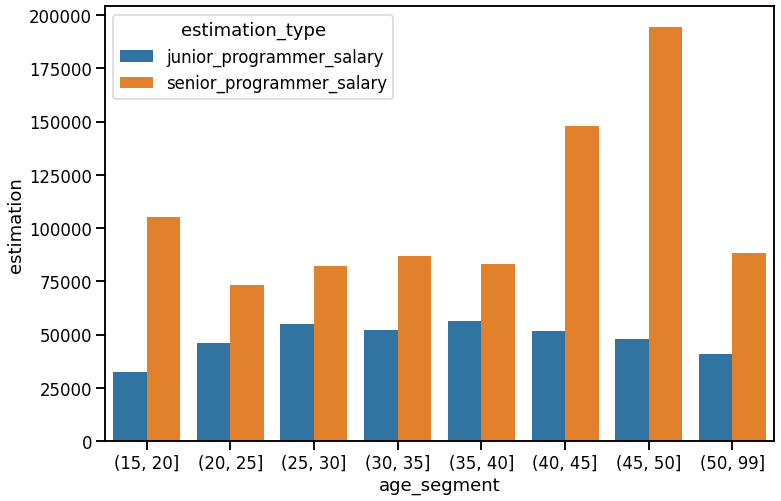

In [42]:
plt.figure(figsize=(12, 8))
seaborn.barplot(data=dmelt_age, x='age_segment', y='estimation', hue='estimation_type',
               ci=None)
plt.show()